Step 0/1000
Step 100/1000
Step 200/1000
Step 300/1000
Step 400/1000
Step 500/1000
Step 600/1000
Step 700/1000
Step 800/1000
Step 900/1000


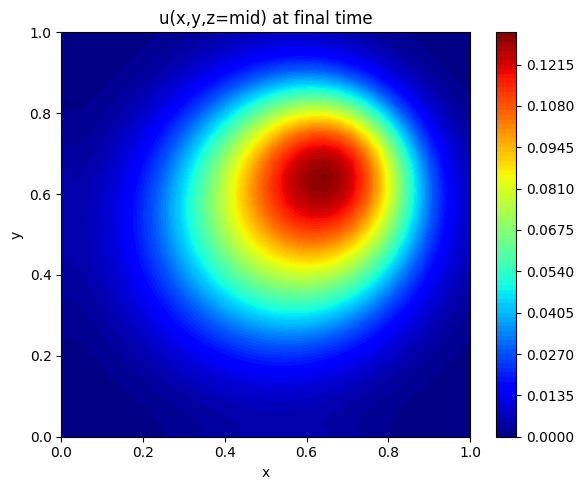

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Domain setup
nx, ny, nz = 32, 32, 32
Lx, Ly, Lz = 1.0, 1.0, 1.0
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
dz = Lz / (nz - 1)

x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
z = np.linspace(0, Lz, nz)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Time setup
T = 1.0
dt = 0.001
nt = int(T / dt)
nu = 0.01  # Viscosity

# Initial condition: smooth hump in the center
def init_field():
    u = np.exp(-50 * ((X - 0.5)**2 + (Y - 0.5)**2 + (Z - 0.5)**2))
    v = np.copy(u)
    w = np.copy(u)
    return u, v, w

# Central difference gradient
def gradient(f, axis):
    if axis == 0:
        return (np.roll(f, -1, axis=0) - np.roll(f, 1, axis=0)) / (2 * dx)
    elif axis == 1:
        return (np.roll(f, -1, axis=1) - np.roll(f, 1, axis=1)) / (2 * dy)
    elif axis == 2:
        return (np.roll(f, -1, axis=2) - np.roll(f, 1, axis=2)) / (2 * dz)

# Laplacian using central difference
def laplacian(f):
    return (
        (np.roll(f, -1, axis=0) - 2 * f + np.roll(f, 1, axis=0)) / dx**2 +
        (np.roll(f, -1, axis=1) - 2 * f + np.roll(f, 1, axis=1)) / dy**2 +
        (np.roll(f, -1, axis=2) - 2 * f + np.roll(f, 1, axis=2)) / dz**2
    )

# RHS of Burgers' equation
def compute_rhs(u, v, w):
    du_dt = -u * gradient(u, 0) - v * gradient(u, 1) - w * gradient(u, 2) + nu * laplacian(u)
    dv_dt = -u * gradient(v, 0) - v * gradient(v, 1) - w * gradient(v, 2) + nu * laplacian(v)
    dw_dt = -u * gradient(w, 0) - v * gradient(w, 1) - w * gradient(w, 2) + nu * laplacian(w)
    return du_dt, dv_dt, dw_dt

# RK4 integrator
def rk4_step(u, v, w):
    k1u, k1v, k1w = compute_rhs(u, v, w)

    u1 = u + 0.5 * dt * k1u
    v1 = v + 0.5 * dt * k1v
    w1 = w + 0.5 * dt * k1w
    k2u, k2v, k2w = compute_rhs(u1, v1, w1)

    u2 = u + 0.5 * dt * k2u
    v2 = v + 0.5 * dt * k2v
    w2 = w + 0.5 * dt * k2w
    k3u, k3v, k3w = compute_rhs(u2, v2, w2)

    u3 = u + dt * k3u
    v3 = v + dt * k3v
    w3 = w + dt * k3w
    k4u, k4v, k4w = compute_rhs(u3, v3, w3)

    u_new = u + dt / 6.0 * (k1u + 2*k2u + 2*k3u + k4u)
    v_new = v + dt / 6.0 * (k1v + 2*k2v + 2*k3v + k4v)
    w_new = w + dt / 6.0 * (k1w + 2*k2w + 2*k3w + k4w)
    return u_new, v_new, w_new

# Initialize fields
u, v, w = init_field()

# Time evolution loop
for n in range(nt):
    u, v, w = rk4_step(u, v, w)
    if n % 100 == 0:
        print(f"Step {n}/{nt}")

# Visualization of u field slice at final time
plt.figure(figsize=(6, 5))
plt.contourf(X[:, :, nz // 2], Y[:, :, nz // 2], u[:, :, nz // 2], levels=100, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('u(x,y,z=mid) at final time')
plt.tight_layout()
plt.show()
